In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.drop(['host_id', 'last_review'], axis=1, inplace=True)

In [5]:
df['reviews_per_month'].fillna(0, inplace=True)

In [6]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
property_types = df['room_type'].value_counts()

In [8]:
popular_neighborhoods = df['neighbourhood'].value_counts().head(10)

In [9]:
df.to_csv('cleaned_airbnb_data.csv', index=False)

In [10]:
import matplotlib.pyplot as plt

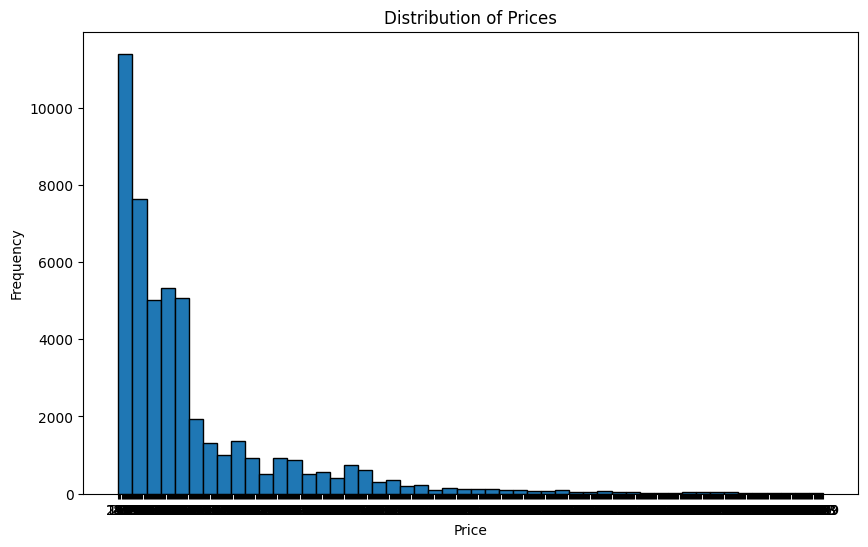

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'],bins=50, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [21]:
import seaborn as sns

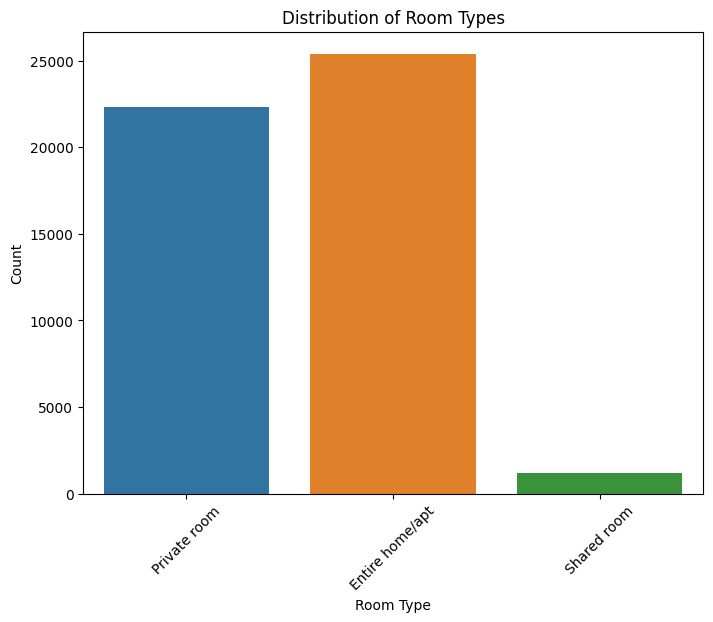

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.xticks(rotation=45)
plt.show()

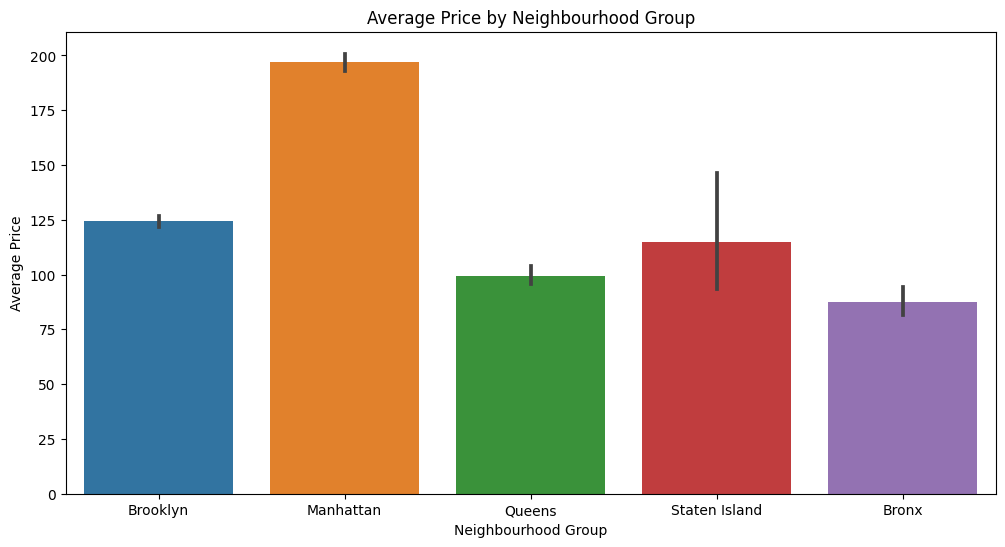

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

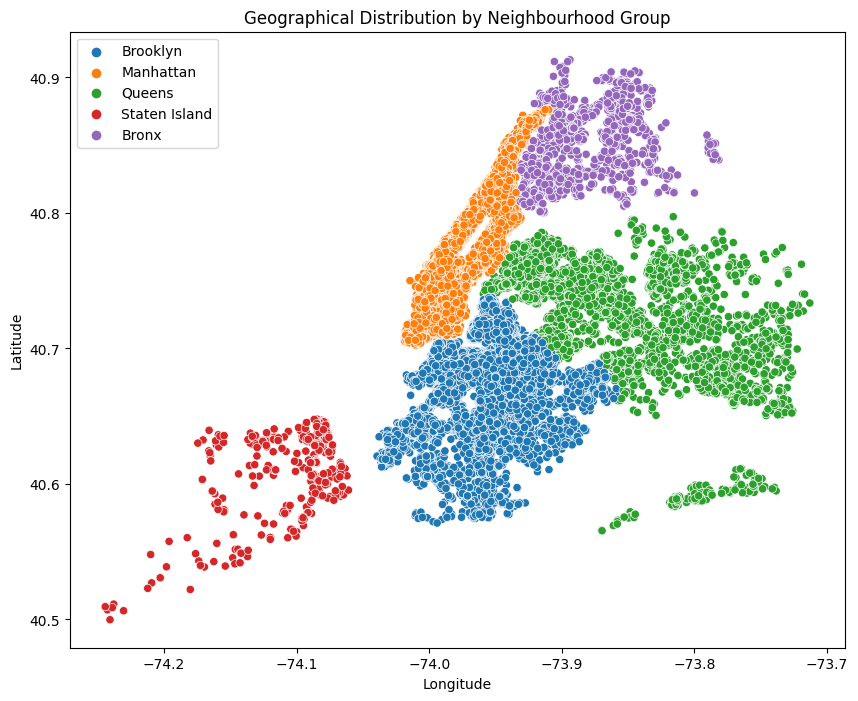

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title('Geographical Distribution by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()